In [1]:
from sklearn.preprocessing import MinMaxScaler

In [2]:
sc = MinMaxScaler()

In [3]:
import sklearn.model_selection
dir(sklearn.model_selection)[:5]

['BaseCrossValidator',
 'BaseShuffleSplit',
 'GridSearchCV',
 'GroupKFold',
 'GroupShuffleSplit']

**all을 이용한 탐색**

In [4]:
import sklearn
sklearn.__all__[-15:-10]

['neural_network',
 'pipeline',
 'preprocessing',
 'random_projection',
 'semi_supervised']

In [5]:
import sklearn.preprocessing
sklearn.preprocessing.__all__[:6]

['Binarizer',
 'FunctionTransformer',
 'KBinsDiscretizer',
 'KernelCenterer',
 'LabelBinarizer',
 'LabelEncoder']

#1. 데이터 전처리

### MinMaxScaler
- 데이터 설명 : 비행탑승 경험 만족도


In [6]:
import pandas as pd

In [7]:
train = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/airline/x_train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/airline/x_test.csv')

In [8]:
display(train.head(3))

,ID,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,id
0,0,Female,Loyal Customer,54,Personal Travel,Eco,1068,3,4,3,...,5,5,3,5,3,5,3,47,22.0,NaN
1,2,Male,Loyal Customer,20,Personal Travel,Eco,1546,4,4,4,...,4,3,3,4,4,4,4,5,2.0,NaN
2,3,Male,Loyal Customer,59,Business travel,Business,2962,0,4,0,...,1,1,1,1,5,1,4,54,46.0,NaN


In [9]:
display(test.head(3))

,ID,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,id
0,1,Male,Loyal Customer,28,Business travel,Business,3414,2,2,2,...,2,4,5,4,4,4,2,0,0.0,40819.0
1,16,Female,disloyal Customer,34,Business travel,Eco,2556,1,1,1,...,2,5,1,5,1,3,2,15,0.0,33335.0
2,17,Female,Loyal Customer,23,Personal Travel,Eco,363,2,5,2,...,5,3,2,4,5,4,5,0,0.0,20749.0


1-1. train 데이터의 Flight Distance 컬럼을 사이킷런 모듈을 이용하여 최솟값을 0 최댓값을 1값으로 하는 데이터로 변환하고 scaling을 이름으로 하는 컬럼으로 데이터프레임에 추가하라

In [10]:
train['Flight Distance']

0        1068
1        1546
2        2962
3         106
4        2917
         ... 
83118     748
83119     601
83120    1259
83121     833
83122     362
Name: Flight Distance, Length: 83123, dtype: int64

In [11]:
train['Flight Distance'].values.reshape(-1,1)

array([[1068],
       [1546],
       [2962],
       ...,
       [1259],
       [ 833],
       [ 362]])

In [12]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
sc.fit(train['Flight Distance'].values.reshape(-1,1))

scaling_data = sc.transform(train['Flight Distance'].values.reshape(-1,1))
train['scaling'] = scaling_data

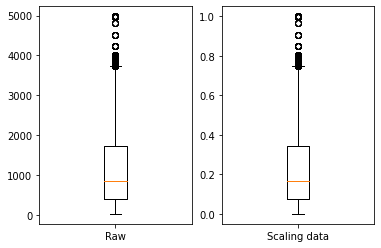

In [13]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,2)
ax[0].boxplot(train['Flight Distance'])
ax[0].set_xticks([1])
ax[0].set_xticklabels(['Raw'])
ax[1].boxplot(train['scaling'])
ax[1].set_xticks([1])
ax[1].set_xticklabels(['Scaling data'])
plt.show()

1-3. train 데이터의 Age 컬럼을 MinMax 스케일링을 진행하고, age_scaling 컬럼에 추가하고 trian 셋과 같은 기준으로 test 데이터의 Age를 스케일링하여 age_scaling에 추가하라

In [14]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
sc.fit(train['Age'].values.reshape(-1,1))

age_scaling = sc.transform(train['Age'].values.reshape(-1,1))
train['age_scaling'] = age_scaling

test_age_scaling = sc.transform(test['Age'].values.reshape(-1,1))
test['age_scaling'] = test_age_scaling

In [15]:
test[['ID','age_scaling']]

,ID,age_scaling
0,1,0.269231
1,16,0.346154
2,17,0.205128
3,25,0.615385
4,27,0.474359
...,...,...
20776,103895,0.653846
20777,103896,0.025641
20778,103897,0.500000
20779,103900,0.358974


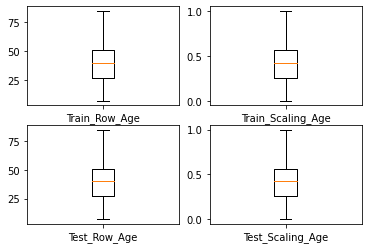

In [16]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2,2)
ax[0][0].boxplot(train['Age'])
ax[0][0].set_xticks([1])
ax[0][0].set_xticklabels(['Train_Row_Age'])
ax[0][1].boxplot(age_scaling)
ax[0][1].set_xticklabels(['Train_Scaling_Age'])
ax[1][0].boxplot(test['Age'])
ax[1][0].set_xticklabels(['Test_Row_Age'])
ax[1][1].boxplot(test_age_scaling)
ax[1][1].set_xticklabels(['Test_Scaling_Age'])
plt.show()

### StandardScaler

1-4. train 데이터의 Age컬럼을 pandas 기본 내장 모듈을 이용하여 정규호 스케일링을 진행하고 age_scaling 컬럼에 추가하라

In [17]:
scaling_ddof1 = (train['Age'] - train['Age'].mean()) / (train['Age'].std())
train['scaling'] = scaling_ddof1

scaling_ddof0 = (train['Age'] - train['Age'].mean()) / (train['Age'].std(ddof=0))
train['scaling_ddof0'] = scaling_ddof0

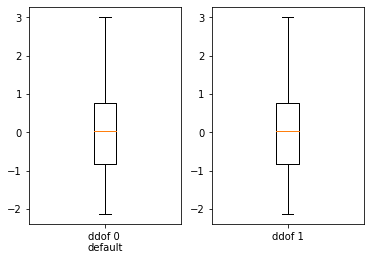

In [18]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,2)
ax[0].boxplot(train['scaling'])
ax[0].set_xticks([1])
ax[0].set_xticklabels(['ddof 0 \ndefault'])
ax[1].boxplot(train['scaling_ddof0'])
ax[1].set_xticks([1])
ax[1].set_xticklabels(['ddof 1'])
plt.show()

1-5. train 데이터의 Age 컬럼을 sklearn 모듈을 이용하여 정규화 스케일링 진행 하고 age_scaling컬럼에 추가하고 train셋과 같은 기준으로 test 데이터의 Age를 스케일링하여 age_scaling에 추가하라

In [19]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

train['age_scaling'] = sc.fit_transform(train['Age'].values.reshape(-1,1))
test['age_scaling'] = sc.transform(test['Age'].values.reshape(-1,1))

test[['ID','age_scaling']]

,ID,age_scaling
0,1,-0.752215
1,16,-0.354927
2,17,-1.083288
3,25,1.035580
4,27,0.307219
...,...,...
20776,103895,1.234224
20777,103896,-2.010293
20778,103897,0.439649
20779,103900,-0.288712


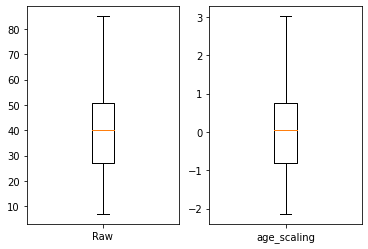

In [20]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,2)
ax[0].boxplot(test['Age'])
ax[0].set_xticks([1])
ax[0].set_xticklabels(['Raw'])
ax[1].boxplot(test['age_scaling'])
ax[1].set_xticks([1])
ax[1].set_xticklabels(['age_scaling'])
plt.show()

# LabelEncoder

**이직여부 판단 데이터**

In [21]:
train = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/HRdata/X_train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/HRdata/y_train.csv')

In [22]:
display(train.head(3))

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,25298,city_138,0.836,Male,No relevent experience,Full time course,High School,NaN,5,100-500,Pvt Ltd,1,45
1,4241,city_160,0.920,Male,No relevent experience,Full time course,High School,NaN,5,NaN,NaN,1,17
2,24086,city_57,0.866,Male,No relevent experience,no_enrollment,Graduate,STEM,10,NaN,NaN,1,50


In [23]:
display(test.head(3))

,enrollee_id,target
0,25298,0.0
1,4241,1.0
2,24086,0.0


### OneHotEncoder

#2. 모델링 전처리

### train_test_split

**투약하는 약을 분류(종속변수 : Drug)**

In [24]:
x = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/drug/x_train.csv')
y = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/drug/y_train.csv')

In [25]:
display(x.head(3))
display(y.head(3))

,ID,Age,Sex,BP,Cholesterol,Na_to_K
0,0,36,F,NORMAL,HIGH,16.753
1,1,47,F,LOW,HIGH,11.767
2,2,69,F,NORMAL,HIGH,10.065


,ID,Drug
0,0,0
1,1,3
2,2,4


1-6. x,y 데이터에서 train, test 셋을 구분하고 train 셋의 y값과 test 셋의 y값의 unique한 value 값 숫자를 출력하라. train:test는 7:3, random_state = 42 고정

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)


In [27]:
t = pd.concat([y_train.value_counts(), y_test.value_counts()], axis=1).rename(columns={0:'train',1:'test'})
t.reset_index(inplace=True)
t.groupby('Drug')[['train','test']].count()

,train,test
Drug,,
0,54,18
1,13,5
2,8,4
3,5,7
4,29,14


In [28]:
drug_train = y_train.groupby('Drug', as_index=False).size().rename(columns={'size':'train'})
drug_test = y_test.groupby('Drug', as_index=False).size().rename(columns={'size':'test'})
pd.merge(drug_train,drug_test, on='Drug', how='inner')

,Drug,train,test
0,0,54,18
1,1,13,5
2,2,8,4
3,3,5,7
4,4,29,14


1-7. x,y 데이터에서 train_test 세트를 구분하고 train 셋의 y값과 test 셋의 y값의 unique한 value 값의 비율을 동일하게 추출하라. 7:3 비율, random_state=42로 고정

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42, stratify=y['Drug'])

y_train.rename(columns={'Drug':'Class'}, inplace=True)
y_test.rename(columns={'Drug':'Class'}, inplace=True)

In [35]:
Ans = pd.concat([y_train.value_counts(), y_test.value_counts()],axis=1).rename(columns={0:'train',1:'test'}).reset_index()
Ans.groupby(['Class'])[['train','test']].count()

,train,test
Class,,
0,50,22
1,13,5
2,8,4
3,8,4
4,30,13


# 3. 모델링

In [37]:
# ensemble

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

In [38]:
# linear_model

from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import GammaRegressor
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import SGDClassifier

In [39]:
# neighbors

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsTransformer
from sklearn.neighbors import NearestNeighbors

In [41]:
# svm

from sklearn.svm import LinearSVC
from sklearn.svm import LinearSVR
from sklearn.svm import OneClassSVM
from sklearn.svm import SVR
from sklearn.svm import SVC

In [44]:
# tree

from sklearn.tree import BaseDecisionTree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import ExtraTreeClassifier
from sklearn.tree import ExtraTreeRegressor

#4. 모델 평가

In [45]:
import sklearn.metrics
dir(sklearn.metrics)

['ConfusionMatrixDisplay',
 'DetCurveDisplay',
 'DistanceMetric',
 'PrecisionRecallDisplay',
 'RocCurveDisplay',
 'SCORERS',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_base',
 '_classification',
 '_dist_metrics',
 '_pairwise_fast',
 '_plot',
 '_ranking',
 '_regression',
 '_scorer',
 'accuracy_score',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'auc',
 'average_precision_score',
 'balanced_accuracy_score',
 'brier_score_loss',
 'calinski_harabasz_score',
 'check_scoring',
 'classification_report',
 'cluster',
 'cohen_kappa_score',
 'completeness_score',
 'confusion_matrix',
 'consensus_score',
 'coverage_error',
 'd2_tweedie_score',
 'davies_bouldin_score',
 'dcg_score',
 'det_curve',
 'euclidean_distances',
 'explained_variance_score',
 'f1_score',
 'fbeta_score',
 'fowlkes_mallows_score',
 'get_scorer',
 'hamming_loss',
 'hinge_loss',
 'homogeneity_completeness_v_measure',
 '